In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# load housing dataset
df = pd.read_csv('./data/Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


Covariance Matrix:


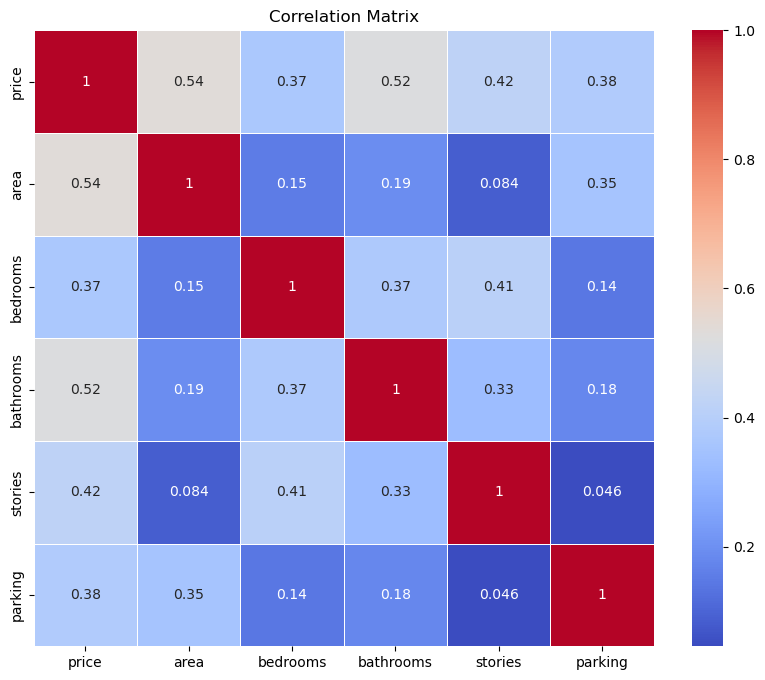

In [3]:
# this is what i need to fix


# EDA on dataset
# creating a scatter plot and a covaariance matrix
# Create scatter plots for price vs. other numeric features

# Define numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns # add this line to fix problem

# Calculate and display covariance matrix
covariance_matrix = df[numeric_columns].cov()
print("Covariance Matrix:")
# print(covariance_matrix)

# Calculate correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Visualize correlation matrix with heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
# looking at the covariance matrix we can see that the most correlated features are price and area and price and bathrooms.
# The least correlated features are the total number of stories and the number of parkings spaces. 





# # EDA on dataset
# # creating a scatter plot and a covaariance matrix
# # Create scatter plots for price vs. other numeric features

# # Calculate and display covariance matrix
# covariance_matrix = df[numeric_columns].cov()
# print("Covariance Matrix:")
# # print(covariance_matrix)

# # Visualize correlation matrix with heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation Matrix')
# plt.show()
# # looking at the covariance matrix we can see that the most correlated features are price and area and price and bathrooms.
# # The least correlated features are the total number of stories and the number of parkings spaces. 


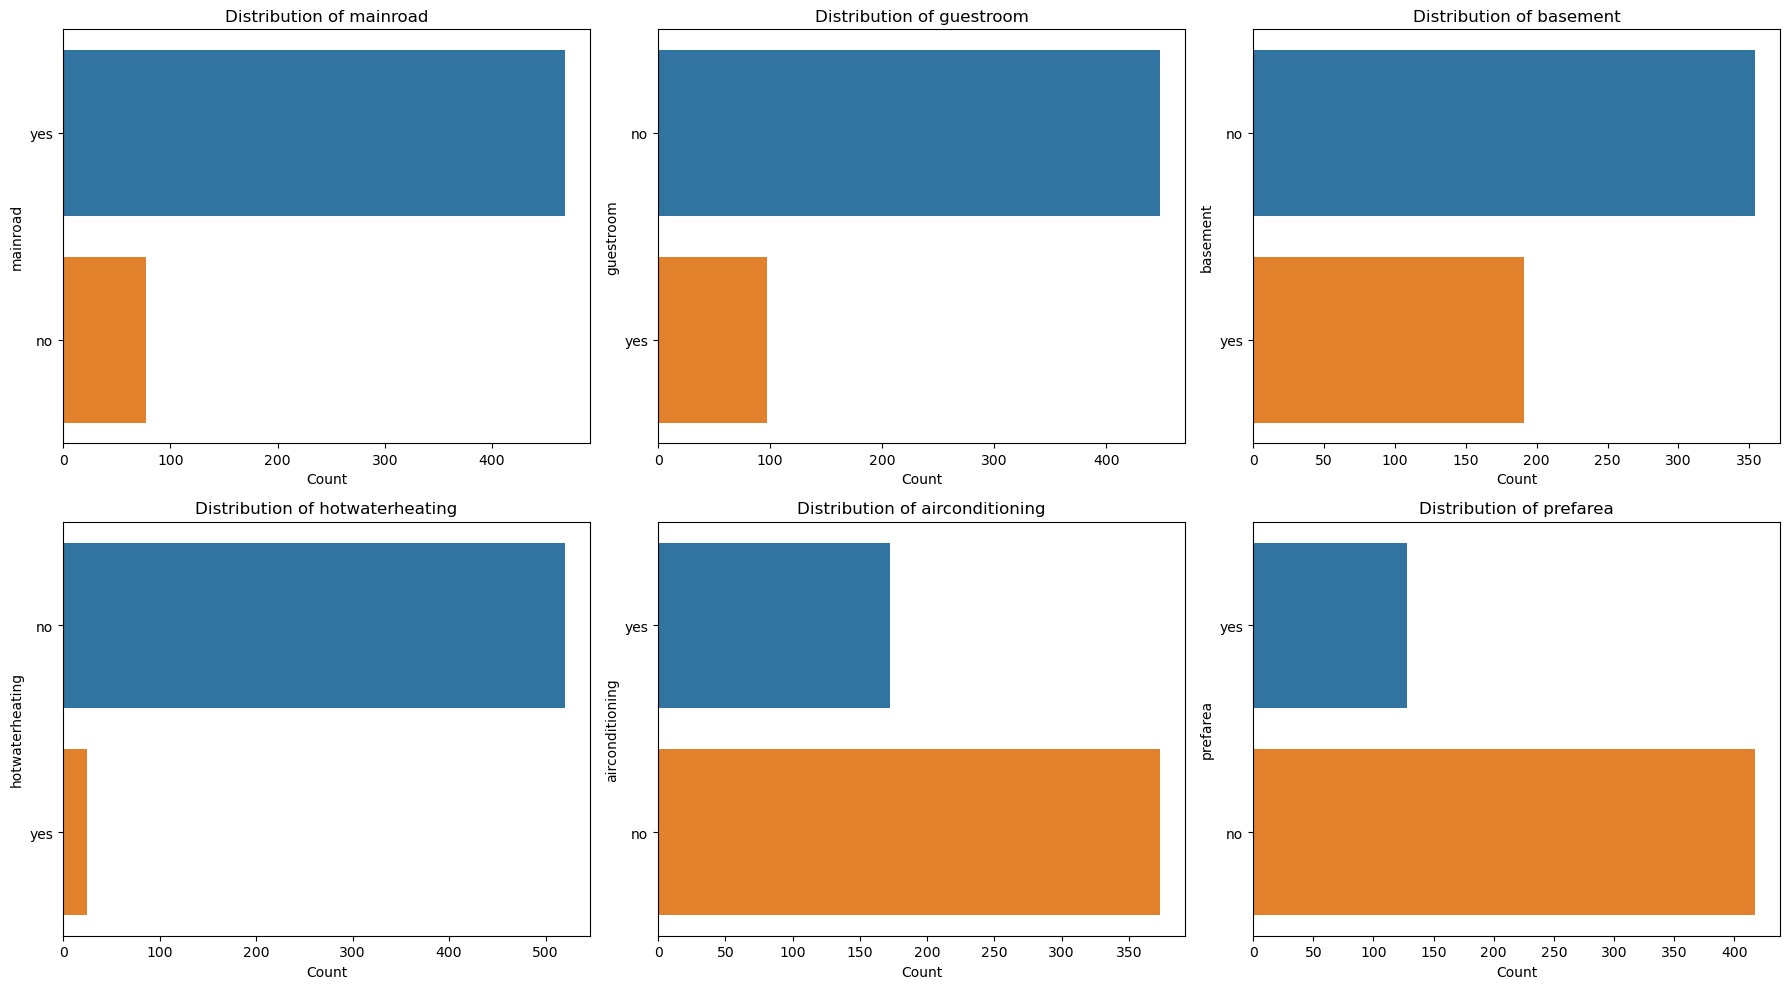

In [4]:
# Count plot for categorical features
categorical_columns = df.select_dtypes(include='object').columns
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    if i < len(axes):
        sns.countplot(y=col, data=df, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel('Count')
        
# Hide unused subplots if any
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)
    
plt.tight_layout()
plt.show()

# we can take a look at the distribution of the categorical variables as well. 
# we can see some interesting patterns like many of the houses do not have airconditioning or hot water heating. It will be interesting to see how this affects the price of the house. 
# other things that may affect the prices of houses. we can see majority of the houses are on the main road and do not have guestrooms. 

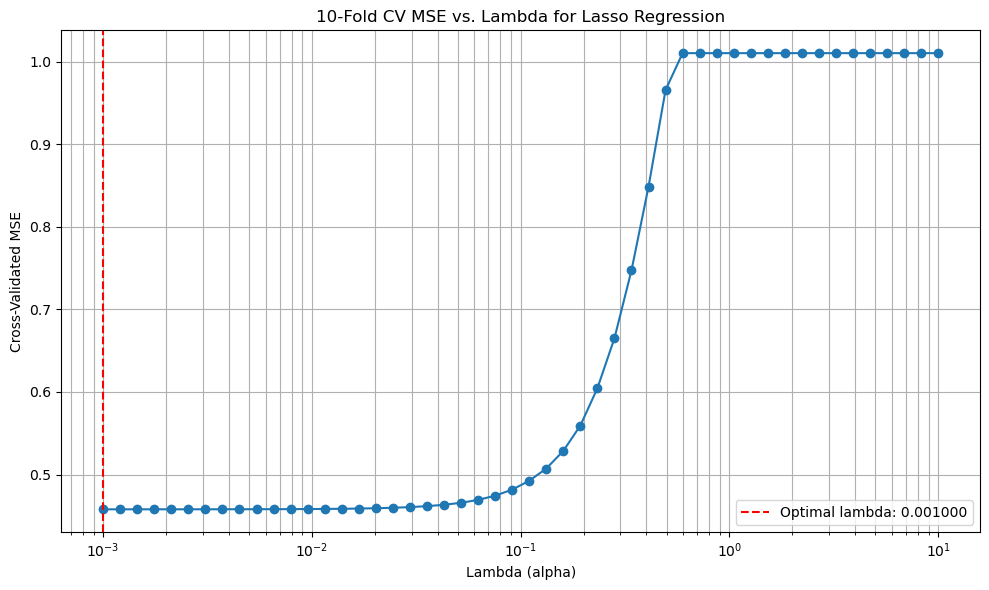

Optimal lambda value: 0.001000


In [5]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

import matplotlib.pyplot as plt

# Define features and target
X = df[numeric_columns].drop('price', axis=1)
y = df['price']

# Z-score standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = (y - y.mean()) / y.std()

# Define range of lambda values (alphas in sklearn)
alphas = np.logspace(-3, 1, 50)

# Store MSE for each alpha
mse_scores = []

# Perform 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # Calculate negative MSE (sklearn's cross_val_score minimizes)
    scores = -cross_val_score(lasso, X_scaled, y_scaled, 
                             scoring='neg_mean_squared_error', 
                             cv=kf)
    mse_scores.append(np.mean(scores))

# Plot results
plt.figure(figsize=(10, 6))
plt.semilogx(alphas, mse_scores, marker='o', linestyle='-')
plt.xlabel('Lambda (alpha)')
plt.ylabel('Cross-Validated MSE')
plt.title('10-Fold CV MSE vs. Lambda for Lasso Regression')
plt.axvline(alphas[np.argmin(mse_scores)], color='r', linestyle='--', 
            label=f'Optimal lambda: {alphas[np.argmin(mse_scores)]:.6f}')
plt.grid(True, which="both", ls="-")
plt.legend()
plt.tight_layout()
plt.show()

print(f"Optimal lambda value: {alphas[np.argmin(mse_scores)]:.6f}")


# what does this plot tell us?
# The plot shows the relationship between the regularization parameter (lambda) and the cross-validated mean squared error (MSE) for Lasso regression.
# as lamda increases, the MSE also increases. This is expected as higher regularization leads to more bias in the model, which can result in underfitting.
# The optimal lambda value is the one that minimizes the MSE, which is indicated by the red vertical dashed line in the plot.

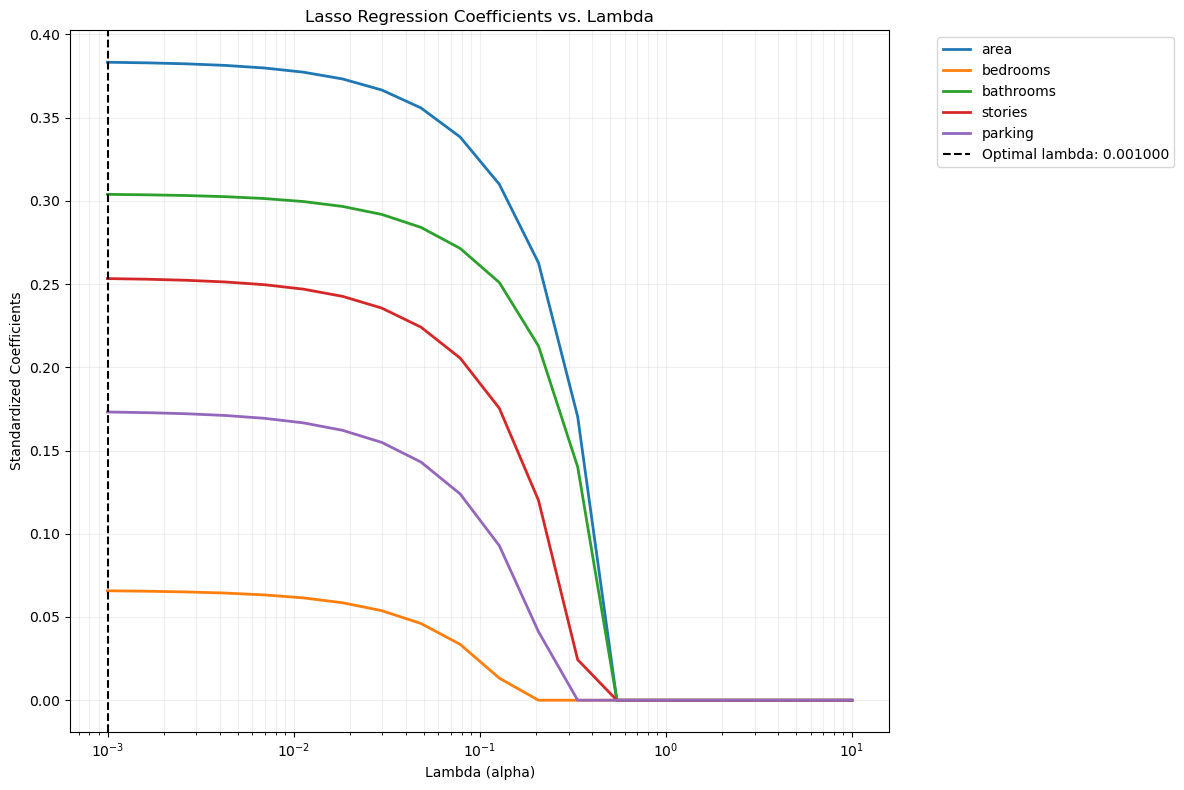

Coefficients at optimal lambda:
area: 0.383240
bedrooms: 0.065744
bathrooms: 0.303865
stories: 0.253279
parking: 0.173138


In [6]:
# Train Lasso models with different alpha values and track the coefficients
feature_names = X.columns
coefs = []

# Use a smaller set of alphas for better visualization
plot_alphas = np.logspace(-3, 1, 20)

for alpha in plot_alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_scaled, y_scaled)
    coefs.append(lasso.coef_)

# Convert to array for easier manipulation
coefs = np.array(coefs)

# Plot the coefficients paths
plt.figure(figsize=(12, 8))
for i, feature in enumerate(feature_names):
    plt.plot(plot_alphas, coefs[:, i], label=feature, linewidth=2)

plt.xscale('log')
plt.xlabel('Lambda (alpha)')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso Regression Coefficients vs. Lambda')
plt.axvline(alphas[np.argmin(mse_scores)], color='k', linestyle='--', 
            label=f'Optimal lambda: {alphas[np.argmin(mse_scores)]:.6f}')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.tight_layout()
plt.show()

# Print the coefficients at the optimal lambda
optimal_alpha = alphas[np.argmin(mse_scores)]
optimal_model = Lasso(alpha=optimal_alpha, max_iter=10000)
optimal_model.fit(X_scaled, y_scaled)
print("Coefficients at optimal lambda:")
for feature, coef in zip(feature_names, optimal_model.coef_):
    print(f"{feature}: {coef:.6f}")

# The coefficients plot shows how the coefficients of each feature change as the regularization parameter (lambda) varies.
# As lambda increases, some coefficients shrink towards zero, indicating that those features are being regularized out of the model.
# The optimal lambda value is indicated by the vertical dashed line, and the coefficients at this point can be interpreted as the most relevant features for predicting house prices.
# The coefficients at the optimal lambda value indicate the relative importance of each feature in predicting house prices.

# LOOK AT ARC FOR MORE INFO